The current shape:  (401, 25)
Removed Entry:  13
Removed Entry:  17
Removed Entry:  21
Removed Entry:  23
Removed Entry:  28
Removed Entry:  30
Removed Entry:  34
Removed Entry:  41
Removed Entry:  55
Removed Entry:  57
Removed Entry:  59
Removed Entry:  64
Removed Entry:  67
Removed Entry:  72
Removed Entry:  78
Removed Entry:  82
Removed Entry:  85
Removed Entry:  86
Removed Entry:  104
Removed Entry:  109
Removed Entry:  113
Removed Entry:  116
Removed Entry:  119
Removed Entry:  122
Removed Entry:  125
Removed Entry:  138
Removed Entry:  142
Removed Entry:  148
Removed Entry:  151
Removed Entry:  156
Removed Entry:  161
Removed Entry:  165
Removed Entry:  166
Removed Entry:  188
Removed Entry:  192
Removed Entry:  194
Removed Entry:  197
Removed Entry:  201
Removed Entry:  202
Removed Entry:  203
Removed Entry:  205
Removed Entry:  208
Removed Entry:  209
Removed Entry:  211
Removed Entry:  215
Removed Entry:  222
Removed Entry:  228
Removed Entry:  231
Removed Entry:  232
Removed 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:169: RuntimeWarning: overflow encountered in exp


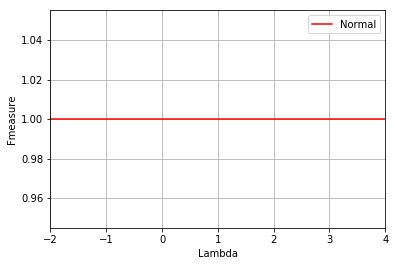

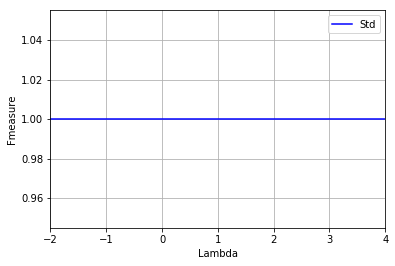

In [2]:
#Logistic Regression by Daniel Mcdonough

from __future__ import division
import numpy as np
import scipy
import math
from scipy.optimize import fmin_bfgs
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import operator
from sklearn.svm import SVC
import re
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#from sklearn.linear_model import LogisticRegression
%matplotlib inline

#logR = LogisticRegression(C=1., solver='lbfgs')
def fmeasure(con_matrix):

    if con_matrix.shape == (1,1):
        TP = con_matrix[0,0]
        FN = 0
        FP = 0
        TN = 0
    else:
        #note TP and TN are switched here becuase we are testing Notckd
        TP = con_matrix[0,0]
        FN = con_matrix[1,0]

        FP = con_matrix[0,1]

        TN = con_matrix[1,1]

    PRE = TP/(TP+FP)
    REC = TP/(TP+FN)
    if math.isnan(PRE):
        PRE = 0
    if math.isnan(REC):
        REC = 0

    fmeasure = 2*((PRE*REC) / (PRE+REC))

    if math.isnan(fmeasure):
        fmeasure = 0

    return fmeasure



class LogisticRegression:
    def __init__(self, data, labels, regularized, alpha=0.01, num_iters=300, normalization='norm'):
        self.normalization_mode = normalization
        self.regularized = regularized
        self.num_iters = num_iters
        self.alpha = alpha

        pass

    def train(self, data, Olabels, unique_classes):

        #print('training....')
        regularized = self.regularized
        # print 'train regularized', regularized

        num_iters = self.num_iters
        m, n = data.shape

        # map labels to program friendly labels
        labels = np.zeros(Olabels.shape)

        uniq_Olabel_names = np.unique(Olabels)

        uniq_label_list = range(len(uniq_Olabel_names))

        for each in zip(uniq_Olabel_names, uniq_label_list):
            o_label_name = each[0]
            new_label_name = each[1]
            labels[np.where(Olabels == o_label_name)] = new_label_name

        labels = labels.reshape((len(labels), 1))


        # if num_classes = 2, then Thetas will contain only 1 Theta
        # if num_classes >2, then Thetas will contain num_classes of Thetas.



        Init_Thetas = []  # to hold initial values of theta

        Thetas = []  # to hold final values of theta to return

        # if (num_classes == 2):
        theta_init = np.zeros((n, 1))
        Init_Thetas.append(theta_init)


        init_theta = Init_Thetas[0]

        new_theta, final_cost = self.computeGradient(data, labels, init_theta)


        Thetas.append(new_theta)


        # elif (num_classes > 2):
        #     for eachInitTheta in range(num_classes):
        #         theta_init = np.zeros((n, 1))
        #         Init_Thetas.append(theta_init)
        #         pass
        #
        #     for eachClass in range(num_classes):
        #         # load data local of the init_theta
        #         # +ve class is 1 and rest are zeros
        #         # its a one vs all classifier
        #
        #         local_labels = np.zeros(labels.shape)
        #
        #         local_labels[np.where(labels == eachClass)] = 1
        #
        #         # assert to make sure that its true
        #
        #         # print eachClass
        #         # print Init_Thetas
        #         init_theta = Init_Thetas[eachClass]
        #
        #         new_theta, final_cost = self.computeGradient(data, local_labels, init_theta)
        #         # print final_cost
        #         Thetas.append(new_theta)
        #         Cost_Thetas.append(final_cost)

        return Thetas

    def classify(self, data, Thetas):

        # since it is a one values all classifier, load all classifiers and pick most likely
        # i.e. which gives max value for sigmoid(X*theta)
        #print(len(Thetas))
        #print((Thetas))
        if (len(Thetas) >1):
            mvals = []
            for eachTheta in Thetas:
                mvals.append(self.sigmoidCalc(np.dot(data, eachTheta)))

                pass
            return mvals.index(max(mvals)) + 1

        elif (len(Thetas) == 1):
            # either is close to zero or 1
            # if more than 0.5 classify as 1 and if less than 0.5 classify as 0
            # print data
            # print Thetas[0]
            # print self.sigmoidCalc(np.dot(data, Thetas[0]))
            a = self.sigmoidCalc(np.dot(data, Thetas[0]))
            #print(a)
            cval = np.round(a)

            #print('classification output: ', cval)
            return cval

    def sigmoidCalc(self, data):

        # if(len(data.flatten()) == 1 ):
        # 	data = data.reshape((1,1))

        # data = np.array(data, dtype=np.longdouble)
        g = 1 / (1 + np.exp(-data))

        return g

    def computeCost(self, data, labels, init_theta):

        llambda = self.regularized

        m, n = data.shape

        theta2 = init_theta[range(1, init_theta.shape[0]), :]

        if (self.normalization_mode == "norm"):
            regularized_parameter = np.dot(llambda / (2 * m), np.sum(np.abs(theta2)))
        else:
            regularized_parameter = np.dot(llambda / (2 * m), np.sum(theta2 * theta2))



        a = self.sigmoidCalc(np.dot(data, init_theta))

        #print(L)
        J = (-1.0 / m) * (np.sum(np.log(a) * labels + (np.log(1 - a) * (1 - labels))))

        J = J + regularized_parameter

        return J

    def computeGradient(self, data, labels, init_theta):
        alpha = self.alpha
        num_iters = self.num_iters
        m, n = data.shape
        llambda = self.regularized


        #print(num_iters)
        for eachIteration in range(num_iters):
            cost = self.computeCost(data, labels, init_theta)

            # compute gradient

            B = self.sigmoidCalc(np.dot(data, init_theta) - labels)

            A = (1 / m) * np.transpose(data)

            grad = np.dot(A, B)

            A = (self.sigmoidCalc(np.dot(data, init_theta)) - labels)
            B = data[:, 0].reshape((data.shape[0], 1))

            grad[0] = (1 / m) * np.sum(A * B)

            A = (self.sigmoidCalc(np.dot(data, init_theta)) - labels)
            B = (data[:, range(1, n)])

            for i in range(1, len(grad)):
                A = (self.sigmoidCalc(np.dot(data, init_theta)) - labels)
                B = (data[:, i].reshape((data[:, i].shape[0], 1)))
                grad[i] = (1 / m) * np.sum(A * B) + ((llambda / m) * init_theta[i])

            init_theta = init_theta + (np.dot((alpha / m), grad))
            #print(init_theta)
        return init_theta, cost

    def mapper(self):
        return None


def numerical_labels(labels):
    unique = list(set(labels))  # set of unique values
    val = list(range(len(unique)))  # values corresponding to each unique value
    for j in range(len(labels)):
        for k in range(len(unique)):
            if labels[j] == unique[k]:
                labels[j] = val[k]
                break;

    return labels

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False



def fmeasure(con_matrix):

    if con_matrix.shape == (1,1):
        TP = con_matrix[0,0]
        FN = 0
        FP = 0
        TN = 0
    else:
        #note TP and TN are switched here becuase we are testing Notckd
        TP = con_matrix[1,1]
        FN = con_matrix[0,1]

        FP = con_matrix[1,0]

        TN = con_matrix[0,0]

    PRE = TP/(TP+FP)
    REC = TP/(TP+FN)
    if math.isnan(PRE):
        PRE = 0
    if math.isnan(REC):
        REC = 0

    fmeasure = 2*((PRE*REC) / (PRE+REC))

    if math.isnan(fmeasure):
        fmeasure = 0

    return fmeasure



#function that cleans empty columns in the dataset and major missing columns
def resize_data(data):

    print("The current shape: ",data.shape)
    #columns_titles = data[0,:] #save the first row
    data = np.delete(data, 0, 0) #delete first row
    #print(columns_titles)

    nullcount_row = [0]*len(data[:,0]) #number of columns
    nullcount_col = [0]*len(data[1,:]) #number of rows

    #remove bad data entries
    for i in range(len(data[:,0])):
        for j in range(len(data[0,:])):
            data[i,j] = re.sub('\s+', '', data[i,j]) #remove special char if that exist
            if data[i,j] == "NA" or data[i,j] == "":
                nullcount_row[i] += 1 #get a count of NA features per data entry

    shaped_data = []
    empty_thresh = len(data[0,:])*0.25 #threshold of empty datapoint to remove the entry

    #if a data entry is missing more than 25% of features then remove it...
    for k in range(len(nullcount_row)):
        if not nullcount_row[k] >= empty_thresh:
            shaped_data.append(data[k]) #append good data
        else:
            print("Removed Entry: ", k)
    shaped_data = np.array(shaped_data)
    #print(shaped_data.shape)
    #print(shaped_data)


    #remove bad features
    for j in range(len(shaped_data[0,:])):
        for i in range(len(shaped_data[:,0])):
            if shaped_data[i,j] == "NA" or shaped_data[i,j] == "":
                nullcount_col[j] += 1 #get a count of NA features per data entry

    clean_data = []
    #print(type(clean_data))
    empty_thresh = len(data[:,0])*0.25 #threshold of empty datapoints to remove the feature
    #print(empty_thresh)

    #if a feature is missing more than 25% of data then remove it...
    for k in range(len(nullcount_col)):
        if not nullcount_col[k] >= empty_thresh:
            clean_data.append(shaped_data[:,k]) #append good data
        else:
            print("Removed Feature: ", k)
    clean_data = np.array(clean_data).T
    #print(clean_data.shape)
    lastcol = clean_data.shape[1]-1
    #print("Last column: ",lastcol)
    labels = clean_data[:,lastcol]#get the labels
    clean_data = np.delete(clean_data, lastcol, 1) #delete the labels

    #print(clean_data)

    return clean_data,labels



#function that gets the mean value dispite the type of data
def getmean(good_data):
    #avg = 0
    good_data = list(map(float, good_data)) #turn strings into floats
    total = sum(good_data)
    avg = total / len(good_data)
    #print(good_data)
    #print(good_data.shape)

    return avg

#function that returns the avg and list of missing data points
def mean_missing(data,col):

    good_data = [] #used to calculate the sum / average
    bad_data = [] #list of locations to data points with NA
    for i in range(data.shape[0]):
        if data[i, col] == '' or data[i, col] == "NA":
            bad_data.append((i, col))
        else:
            good_data.append(data[i, col])
    #print(col)
    mean = getmean(good_data)
    return mean,bad_data

def discrete_to_num(data,col):
    good_data = []  # used to calculate the sum / average
    bad_data = [] #list of locations to data points with NA
    #get the good data in the column
    for i in range(data.shape[0]):
        if data[i, col] == '' or data[i, col] == "NA":
            bad_data.append((i, col))
            good_data.append(data[i, col])
        else:
            good_data.append(data[i, col])

    unique = list(set(good_data)) # set of unique values
    unique.remove("NA")
    val = list(range(len(unique))) #values corresponding to each unique value
    #print(unique)
    # print(val)
    #convert good_data into ints
    for j in range(len(good_data)):
        for k in range(len(unique)):
            if good_data[j] == unique[k]:
                good_data[j] = val[k]
                break;
    unique = good_data

    unique= list(filter(lambda a: a != "NA", unique))

    #print(val)
    # print(col)
    # print(good_data)
    mean = getmean(unique)
    return mean, bad_data,good_data

#function the replaces missing data with
def calcdata(data):
    for i in range(data.shape[1]):

        if isfloat(data[5,i]): #alter the numerical data
            avg, list = mean_missing(data,i)
            for j in range(len(list)): #replace NA
                xy = list[j]
                data[xy[0], xy[1]] = avg
        else:
            #change discrete values to numbers
            avg, list,data[:,i] = discrete_to_num(data,i)
            for j in range(len(list)): #replace NA
                xy = list[j]
                data[xy[0], xy[1]] = avg

    return data


def cleanupdata(data):
    shaped_data,labels = resize_data(data) #delete bad data
    print("The New shape: ", shaped_data.shape)
    avg_data = calcdata(shaped_data)
    print("Missing Values filled with Averages")
    avg_data = np.delete(avg_data, 0, 0) #delete first row (aka feature names)
    #print(avg_data)
    return avg_data,labels

def main():


    fileobject = np.loadtxt("./chronic_kidney_disease_full.csv", delimiter=",", dtype='str')

    data, labels = cleanupdata(fileobject)
    # print(data)
    labels = numerical_labels(labels)
    data = np.asfarray(data, float)
    labels = np.asfarray(labels, float)
    np.set_printoptions(threshold=np.nan)
    training_size = int(math.floor(len(data[:, 0]) * 0.8))  # 80% training size
    # print(training_size)

    training = data[:training_size]  # training data
    validation = data[training_size:]  # vaildation data

    training_labels = labels[:training_size]
    true_labels = labels[training_size+1:]
    true_labels.flatten()
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    # dataset = pd.read_csv('ecommerce_data.csv')


    norm_fm = []
    std_fm = []

    #
    plt.xlabel('Lambda')
    plt.ylabel('Fmeasure')
    plt.xlim([-2,4])
    plt.grid(True)
    lambda_range = [-2,-1,0,1,2,3,4]
    #print(true_labels)
    for i in range(-2,5):
        #print(i)

        lr1 = LogisticRegression(training, training_labels, i, 0.2, 1, normalization='norm')
        learntParameters = lr1.train(training, training_labels, np.unique(training_labels))

        Pred_labels = lr1.classify(validation,learntParameters)
        #print(Pred_labels)


        con_matrix = confusion_matrix(true_labels, Pred_labels)
        #print(con_matrix)
        #print("MODE: Norm F-Measure", fmeasure(con_matrix))
        norm_fm.append(fmeasure(con_matrix))



        lr2 = LogisticRegression(training, training_labels, i, 0.2, 1, normalization='std')
        learntParameters = lr2.train(training, training_labels, np.unique(training_labels))

        Pred_labels = lr2.classify(validation, learntParameters)
        # print(Pred_labels)
        # print(true_labels)
        con_matrix = confusion_matrix(true_labels, Pred_labels)

        #print(con_matrix)
        #print("MODE: STD F-Measure", fmeasure(con_matrix))

        std_fm.append(fmeasure(con_matrix))


        #plt.plot(fmeasure(con_matrix),i)


    #plot Norm
    plt.plot(lambda_range,norm_fm,label="Normal",c="r" )
    plt.legend(loc='best')
    plt.show()


    #plot STD
    plt.xlabel('Lambda')
    plt.ylabel('Fmeasure')
    plt.xlim([-2,4])
    plt.grid(True)

    plt.plot(lambda_range,std_fm,label="Std",c="b" )
    plt.legend(loc='best')

    plt.show()

    #this was for comparison
    # logR.fit(training, training_labels)
    # pred = logR.predict(validation)
    # print(pred)
    # print(true_labels)
    # con_matrix = confusion_matrix(true_labels, pred)
    # print(con_matrix)



if __name__ == "__main__":
    main()
